In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

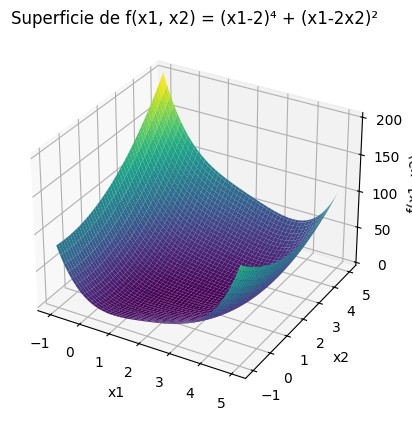

In [3]:
# Definir la función
def f(x1, x2):
    return (x1 - 2)**4 + (x1 - 2*x2)**2

# Generar datos para graficar
x1 = np.linspace(-1, 5, 100)
x2 = np.linspace(-1, 5, 100)
x1, x2 = np.meshgrid(x1, x2)
y = f(x1, x2)

# Graficar la superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')

# Etiquetas y título
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Superficie de f(x1, x2) = (x1-2)⁴ + (x1-2x2)²')

# Mostrar la gráfica
plt.show()


In [4]:
def function(x,lambdak,d):
  f = np.power((x[0]+lambdak*d[0])-2,4) + np.power((x[0]+lambdak*d[0])-(2*(x[1]+lambdak*d[1])),2)
  return f

def golden_section_method(ak,bk,x,d):
  l = 0.03
  alpha = 0.618
  lambdak = ak + (1 - alpha) * (bk - ak)
  miuk = ak + alpha * (bk - ak)
  k = 1

  while bk - ak >= l:
    if function(x,lambdak,d) > function(x,miuk,d):
      ak = lambdak
      lambdak = miuk
      miuk = ak + alpha * (bk - ak)

    elif function(x,lambdak,d) <= function(x,miuk,d):
      bk = miuk
      miuk = lambdak
      lambdak = ak + (1 - alpha) * (bk - ak)

    k+= 1
    lambda_gsm = (lambdak+miuk)/2
  return lambda_gsm

In [5]:
epsilon = 0.03
x = np.array([0, 3])

In [6]:
def cyclic_method(x, epsilon):
  n = len(x)
  d = np.eye(n)
  y = x.copy()
  k = 1
  j = 1

  while True:
    lambdaj = golden_section_method(-10, 10, y, d[j-1])
    y = y + lambdaj * d[j-1]
    
    if j < n:
      j += 1
    else:
      xk1 = y
      if np.linalg.norm(xk1 - x) < epsilon:
        break
      
      x = xk1
      y = x.copy()
      j = 1
      k += 1

  return k, x, lambdaj, y


In [7]:
k, x, lambdaj, y = cyclic_method(x,epsilon)
print(cyclic_method(x,epsilon))

(1, array([2.27460119, 1.1420815 ]), -0.019642661159558674, array([2.25508705, 1.12243884]))


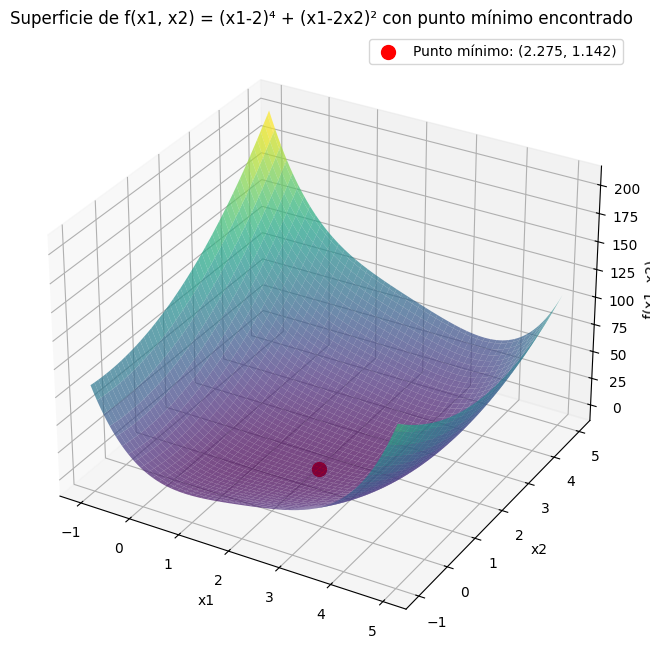

In [8]:
# Graficar la superficie de la función que realmente se optimizó
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Recalcular los valores Z para la superficie
z_surface = f(x1, x2)
ax.plot_surface(x1, x2, z_surface, cmap='viridis', alpha=0.7)

# Graficar el punto mínimo encontrado
ax.scatter(x[0], x[1], f(x[0], x[1]), color='red', s=100, label=f'Punto mínimo: ({x[0]:.3f}, {x[1]:.3f})')

# Etiquetas y título
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Superficie de f(x1, x2) = (x1-2)⁴ + (x1-2x2)² con punto mínimo encontrado')

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()
